In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [2]:
#list of stocks in portfolio
stocks = ['AAPL','DIS','CAT','MCD']

In [3]:
#download daily price data for each of the stocks in the portfolio
data = web.DataReader(stocks,data_source='yahoo',start='01/01/2011')['Adj Close']

In [4]:
#convert daily stock prices into daily returns
daily_returns = data.pct_change()

#calculate the average daily return and the covariance of daily returns
mean_daily_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()

In [5]:
#number of randomly weighted portfolios that will be created in loop
portfolios = 25000

#set up array to hold results
results = np.zeros((3+len(stocks),portfolios))

for i in range(portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(len(stocks)))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

In [6]:
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns= ['ret','stdev','sharpe'] + stocks)

#locates the position of portfolio with highest Sharpe Ratio
optimal_portfolio = results_frame.iloc[results_frame['sharpe'].idxmax()]

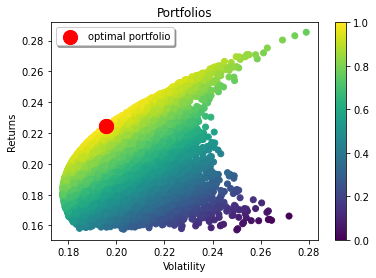

In [7]:
#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe, label='_nolegend')
plt.scatter(optimal_portfolio[1],optimal_portfolio[0],marker="o",color='r',s=200)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Portfolios')
plt.legend(handles=[plt.scatter(optimal_portfolio[1],optimal_portfolio[0],marker="o",color='r',s=200)], labels=["optimal portfolio"], shadow=True)
plt.colorbar()

In [8]:
# displays optimal portfolio metrics and weights
display(pd.DataFrame(optimal_portfolio.rename("optimal portfolio")).T)

,ret,stdev,sharpe,AAPL,DIS,CAT,MCD
optimal portfolio,0.224481,0.195736,1.146861,0.438133,0.229104,0.005163,0.3276
